In [2]:
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import pandas as pd
boston =datasets.load_boston()
bos = pd.DataFrame(data=boston.data,columns=boston.feature_names)
target = pd.Series(data = boston.target,name='target')
bos['target'] =target

/Users/zhuhe/miniforge3/envs/python_spring02/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

<AxesSubplot:>

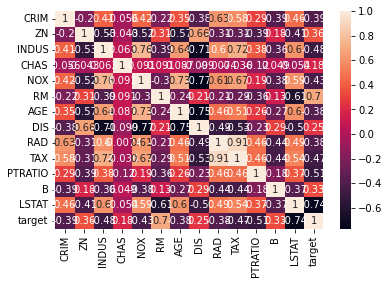

In [3]:
corr_df =bos.corr()
import seaborn as sns
sns.heatmap(corr_df,annot=True)

In [4]:
#R^2 MSE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm =LinearRegression()
from sklearn.model_selection import train_test_split
train_X,test_X,train_y , test_y= train_test_split(bos.iloc[:,:-1],bos.iloc[:,-1],test_size=0.3)
train_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
402,9.59571,0.0,18.10,0.0,0.693,6.404,100.0,1.6390,24.0,666.0,20.2,376.11,20.31
27,0.95577,0.0,8.14,0.0,0.538,6.047,88.8,4.4534,4.0,307.0,21.0,306.38,17.28
366,3.69695,0.0,18.10,0.0,0.718,4.963,91.4,1.7523,24.0,666.0,20.2,316.03,14.00
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
69,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26
276,0.10469,40.0,6.41,1.0,0.447,7.267,49.0,4.7872,4.0,254.0,17.6,389.25,6.05
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07


In [5]:
lm.fit(train_X,train_y)
scores =lm.score(test_X,test_y)
MSL = mean_squared_error(y_true=test_y,y_pred=lm.predict(test_X))
MSL

22.31826367154567

In [6]:
#直接进行交叉验证就行了：

import numpy as np
from sklearn.linear_model import RidgeCV
alphas = np.logspace(-10,10,200)
lr_cv = RidgeCV(alphas=alphas).fit(train_X,train_y)
lr_cv.alpha_
#这个是选取到了最好的alpha 0.01




0.021963853724165514

In [7]:
from sklearn.linear_model import Ridge
lr = Ridge(alpha=0.03489101213406781)
lr.fit(train_X,train_y)
lr.score(test_X,test_y)


#这个把参数給调节出来才行；

0.7454134864652837

In [11]:


from sklearn.linear_model import Ridge
lr = Ridge(alpha=10000000000000)
lr.fit(train_X,train_y)
lr.coef_













array([-9.67002192e-10,  2.85421400e-09, -1.10567600e-09,  1.07408459e-11,
       -1.58809229e-11,  1.61858566e-10, -3.30058005e-09,  1.77933167e-10,
       -1.01104820e-09, -2.49594242e-08, -3.59199213e-10,  8.38987961e-09,
       -1.69520818e-09])

In [ ]:


from sklearn import metrics
metrics.r2_score()




